In [1]:
!jupyter labextension list
!jupyter --version

JupyterLab v4.0.11
C:\Users\hlin_\anaconda3\share\jupyter\labextensions
        jupyter-matplotlib v0.11.4 enabled ok
        jupyterlab-plotly v5.22.0 enabled  X
        @anaconda/assistant v4.0.15 enabled ok (python, aext_assistant)
        @anaconda/core v4.0.15 enabled ok (python, aext_core)
        @anaconda/panels v4.0.15 enabled ok (python, aext_panels)
        @anaconda/share_notebook v4.0.15 enabled ok (python, aext_share_notebook)
        @jupyter-notebook/lab-extension v7.0.8 enabled ok
        @jupyter-widgets/jupyterlab-manager v5.0.13 enabled ok (python, jupyterlab_widgets)
        @lckr/jupyterlab_variableinspector v3.1.0 enabled ok (python, lckr_jupyterlab_variableinspector)
        @pyviz/jupyterlab_pyviz v3.0.2 enabled ok


   The following extensions are outdated:
        jupyterlab-plotly
        
   Consider checking if an update is available for these packages.



Selected Jupyter core packages...
IPython          : 8.25.0
ipykernel        : 6.28.0
ipywidgets       : 8.1.5
jupyter_client   : 8.6.0
jupyter_core     : 5.7.2
jupyter_server   : 2.14.1
jupyterlab       : 4.0.11
nbclient         : 0.8.0
nbconvert        : 7.10.0
nbformat         : 5.9.2
notebook         : 7.0.8
qtconsole        : 5.5.1
traitlets        : 5.14.3


In [2]:
import numpy as np
import gudhi
import random
import math


import matplotlib.pyplot as plt
from IPython.display import Image

Topology, in the most abstract form, is the study of sets and the operations on them. It describes how elements of a set relate spatially to each other. The word topology derives from the Greek word "topo", which means place, and "-logy" which means knowledge, or study. 

Side note: A power set $\mathcal{P}$ of a set $X$ is a set that contains all possible subset of $X$

# What is topology

Definition T.1 : Topology 

 Let $X$ be a set and $\mathcal{P}(X)$ denotes a power set of $X$. A topology on set $X$ is defined as a subset of the power set $\mathcal{P}(X)$, i.e. $T\subseteq \mathcal{P}(X)$ such that:

* $\phi, X \in T$
* Any union of the element $T$ is an element of $T$.
  
  i.e.: Let $I$ be the index set that labels the subscript $S_i$ for any $i\in I$. $\bigcup_{i\in I} S_i \in T \text{, where } \{S_i| i\in I\} \in T$

* Any intersection of finitely many elements of $T$ is an element of $T$.

  i.e.: $S_i \cap S_j \in T \text{, where } i, j \in I$

Example 1: $X = \{0,1,2\}$, $\mathcal{P}(X) = \{\phi, \{0\}, \{1\}, \{2\}, \{0,1\}, \{1, 2\}, \{0, 2\}, \{0, 1, 2\} \}$. 
* $T_1 =\{\phi, \{0\}, \{1, 2\} \}$  is not a topology because $\{0\} \cup \{1,2\} = \{0,1,2\} \not\in T_1$
* $T_2 = \{\phi, \{0, 1\}, \{1, 2\}, \{ 0,1,2\} \} $ is not a topology because $\{0,1\} \cap \{1,2\} = \{1\} \not\in T_2$
* $T_3 = \{\phi, \{0\}, \{1\} , \{0,1\} \}$ is a topology because it satisfies all three properties.

# Cover

Definition T.2: Cover

Let $T$ be a topological space, and $\mathcal{C}$ be a collection of subsets of $T$, i.e. $C = \{S_i\}_{i\in I}$. The collection $\mathcal{C}$ is a cover if all the element in $T$ is contained within $\mathcal{C}$, i.e. 
\begin{equation}
X = \bigcup_{i\in I} S_i 
\end{equation}

Type of covers:

1. Definition T.2.1: An open cover

    A cover $\mathcal{C}$ is open if each $S_i$ is an open set in the topology of $T$. 

2. Definition T.2.2: A finite cover

    A cover $\mathcal{C}$ is finite if the index set $I$ is finite

3. Definition T.2.3.1(informal): A contractible set

    To formally define a contractible set requires the concept of homology. Informally, a set $X$ is contractible if it can be deformed into a single point within that space. Formally, a set $X$ is contractable if there exists a point $x_0\in X$ and a continuous map $H: X \times [0,1] \rightarrow X$ such that 

* identity property: $H(x, t=0) = x$ 
* everything collapse to $x_0$ at maximum $t=1$ : $H(x,t=1) = x_0$

4. Definition T.2.3.2: A good cover

    A cover is good if all its open sets and all intersections of finitely many open sets are contractible.

Examples:
1. 1D real line $\mathbb{R} = (-\infty, \infty)$. $C = \{(-\infty, 0], (0,1), (0, \infty)\}$ is a cover of $\mathbb{R}$. 
2. Cover of a unit square:
       Consider a $T$ to be a unit square (see figure below). A cover of $T$ can be a collection of overlapping circles with radius $r_i$ centered at point $(x_i,y_i) \in T$, i.e. $C = \{\{B((x_1,y_1), r_1)\}, \{B((x_2,y_2), r_2)\}, ...\}$, as illustrated below:

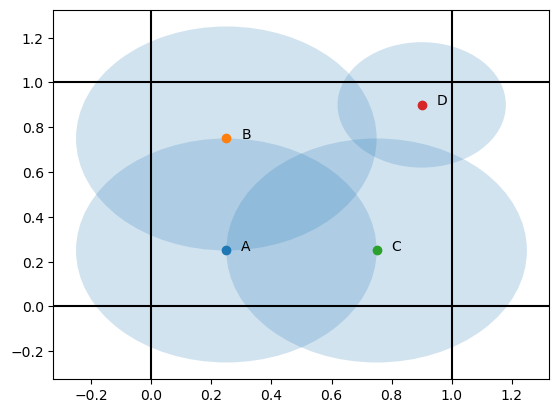

In [4]:
r = 0.5
circle1 = plt.Circle((0.5, 0.5), r, alpha = 0.2)
circle2 = plt.Circle((0.75, 0.5), r, alpha = 0.2)
circle3 = plt.Circle((0.25, 0.5), r, alpha = 0.2)
circle4 = plt.Circle((0.25, 0.25), r, alpha = 0.2)
circle5 = plt.Circle((0.25, 0.75), r, alpha = 0.2)
circle6 = plt.Circle((0.75, 0.25), r, alpha = 0.2)
circle7 = plt.Circle((0.9, 0.9), 0.28, alpha = 0.2)
circle8 = plt.Circle((0.5, 0.25), r, alpha = 0.2)
circle9 = plt.Circle((0.5, 0.75), r, alpha = 0.2)

ax = plt.gca()

#ax.plot(0.5, 0.5, 'o')
#ax.plot(0.75, 0.5, 'o')
#ax.plot(0.25, 0.5, 'o')
ax.plot(0.25, 0.25, 'o')
ax.plot(0.25, 0.75, 'o')
ax.plot(0.75, 0.25, 'o')
ax.plot(0.9, 0.9, 'o')
#ax.plot(0.5, 0.25, 'o')
#ax.plot(0.5, 0.75, 'o')

dx = 0.05
ax.text(0.25 + dx, 0.25, 'A')
ax.text(0.25 + dx, 0.75, 'B')
ax.text(0.75 + dx, 0.25, 'C')
ax.text(0.9 + dx, 0.9, 'D')

#ax.add_patch(circle1)
#ax.add_patch(circle2)
#ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
#ax.add_patch(circle8)
#ax.add_patch(circle9)

ax.axhline(y = 0, xmin=0, xmax=1.0, color = 'k')
ax.axhline(y = 1, xmin=0, xmax=1.0, color = 'k')
ax.axvline(x = 0, ymin = 0, ymax = 1.0, color = 'k')
ax.axvline(x = 1, ymin = 0, ymax = 1.0, color = 'k')



# Nerve theorem

Before moving on, we will introduce the concept of nerve, a mathematical object describing the intersections between a collection of sets. 

Definition T.3.1: Nerve
 
 A nerve $\mathcal{N}$ of a collection of sets $\mathcal{C} = \{S_i\}_{i\in I}$ is a collection of subset $\mathcal{C}$ that satisfies the following properties:

 * (Nerve contains the null set) $\phi \in \mathcal{N}$
 * (Nerve contains all sets (included the unions) that have nontrivial intersections) If $\bigcap_{j\in J} S_i \neq \phi, J \subseteq I$, then $J\in \mathcal{N}$

Example: We use the unit square plot as our example. Each circle represents a set; its elements are the points contained within. Then, we have a collection $\mathcal{S} = \{A, B, C, D\}$. From the plot above, the non-trivial intersections are $A\cap B$, $A\cap C$, $B\cap C$ $A\cap B\cap C$,  $B\cap D$, $C\cap D$, $B\cap C\cap D$. Then, a nerve of $\mathcal{S}$ can be constructed as followed:
$$
\mathcal{N}(\mathcal{S}) = \{\phi, A, B, C, D, A\cup B, A\cup C, B\cup C, B\cup D, C\cup D, A\cup B \cup C, B\cup C\cup D\}
$$

1. Remark 1: A subset intersecting itself is nontrivial, i.e. $A\cap A = A$, thus it is included within nerve.
2. Remark 2: A nerve on a cover is a natural way to build a simplicial complex. We will discuss what a simplicial complex is in the next section.



# Nerve theorem
The nerve theorem relates nerve with topology. It says the following:

Definition T.3.2: If $\mathcal{C}$ is a good cover, the nerve of $\mathcal{C}$ is homotopy equivalent to the union of the sets


# What is a Graph

Definition 2: (Simple) Graph

An undirected graph $G$ is an ordered pair $G = (V,E)$ that satisfies the following:

* $V$ is a set known as vertices
* $E = \{(x,y)| x, y\in V , x\neq y\}$ is an unordered pair of $V$ known as the edges $E$

Example 1: $V = \{0,1,2\}$ and $E = \{(0,1), (1,2) \}$ refers to the following graph:



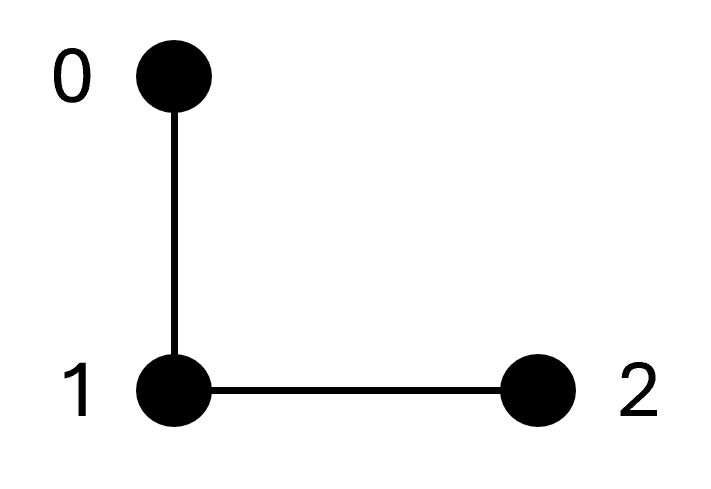

In [7]:
Image(filename='graph.png', width=200)

# What is a hypergraph

Definition 3: Hypergraph

A hypergraph $G_H$ is an ordered pair $G_H = (V,\mathcal{E})$ that satisfies the following:

* $V$ is a set known as vertices
* $\mathcal{E} \subseteq (\mathcal{P}(V) - \phi)$ is a subset of the powerset of V, known as the hyperedge. Each hyperedge is a subset of vertices, and it can contain any number of vertices. 

# What is a simplicial complex

Definition 4: Abstract Simplicial Complex

An abstract simplicial complex $K$ is a collection of subsets of a finite or infinite set $V$ (called the vertex set) such that:

* Every subsets in $K$ is a finite set of elements of $V$ (Non-empty subset)
* If $\sigma \in K$ and $\tau \subseteq \sigma$, then $\tau \in K$. ($K$ is closed under the operation of taking subsets.)
* $K$ must include the empty set $\phi$

Examples:

1. 1-simplex(edge) : $V = \{ v_1, v_2 \}$, $K = \{\phi, \{v_1\}, \{v_2\}, \{v_1, v_2\}\} $, 
2. 2-simplex(triangle) : $V = \{ v_1, v_2, v_3 \}$, $K = \{\phi, \{v_1\}, \{v_2\},\{v_3\}, \{v_1, v_2\}, \{v_2, v_3\}, \{v_1, v_3\}, \{v_1, v_2, v_3\} \}$

Properties:
1. A vertices is an element of the vertex set
2. A simplicecs is a subset of $V$ that is an element of the simplicial complex $K$
    * example: $V = \{v_1, v_2, v_3, v_4\}$. $\sigma_1 = \{v_1, v_2\}$ is a 1-simplex(edge), $\sigma_2 = \{v_1,v_2,v_3\}$ is a 2-simplex(triangle), and $\sigma_3 = \{v_1,v_2,v_3,v_4\}$ is a 3-simplex(tetrahedron)
3. A face is a subset of a simplex $\sigma$ 

We are going to visualize a simplicial complex using gudhi library. 

In [9]:
# Coordinates of the points
points=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1],[1,1,0],[0,1,1]])  # define the coordinates of each vertices in the 3d space
# Build the simplicial complex with a tetrahedon, an edge and an isolated vertex
cplx=gudhi.SimplexTree()
cplx.insert([4,6])       # make [1,1,1] and [0,1,1] as an edge
cplx.insert([0])         # make [0,0,0] as an isolated vertex
cplx.insert([1,2,3,5])   # make other points as a tetrahedron

print('vertices:')
for s in cplx.get_skeleton(0): 
     #  print the vertices
    print(s)

# List of edges (point coordinates)
edges = []
print('all elements with dimension(1) or lower')
for s in cplx.get_skeleton(1):
    # print the edges    
    e = s[0]
    print(s ,len(s[0]))
    if len(e) == 2:
        edges.append(points[[e[0],e[1]]])
        
print('all elements with dimension(2) or lower')
for s in cplx.get_skeleton(2):
    print(s, len(s[0]))
    
# List of triangles (point indices)
triangles = np.array([s[0] for s in cplx.get_skeleton(2) if len(s[0])==3])

#print('point:', points)
print('edge:', edges)
print('triangle:', triangles)

vertices:
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
all elements with dimension(1) or lower
([0], 0.0) 1
([1, 2], 0.0) 2
([1, 3], 0.0) 2
([1, 5], 0.0) 2
([1], 0.0) 1
([2, 3], 0.0) 2
([2, 5], 0.0) 2
([2], 0.0) 1
([3, 5], 0.0) 2
([3], 0.0) 1
([4, 6], 0.0) 2
([4], 0.0) 1
([5], 0.0) 1
([6], 0.0) 1
all elements with dimension(2) or lower
([0], 0.0) 1
([1, 2, 3], 0.0) 3
([1, 2, 5], 0.0) 3
([1, 2], 0.0) 2
([1, 3, 5], 0.0) 3
([1, 3], 0.0) 2
([1, 5], 0.0) 2
([1], 0.0) 1
([2, 3, 5], 0.0) 3
([2, 3], 0.0) 2
([2, 5], 0.0) 2
([2], 0.0) 1
([3, 5], 0.0) 2
([3], 0.0) 1
([4, 6], 0.0) 2
([4], 0.0) 1
([5], 0.0) 1
([6], 0.0) 1
edge: [array([[1, 0, 0],
       [0, 1, 0]]), array([[1, 0, 0],
       [0, 0, 1]]), array([[1, 0, 0],
       [1, 1, 0]]), array([[0, 1, 0],
       [0, 0, 1]]), array([[0, 1, 0],
       [1, 1, 0]]), array([[0, 0, 1],
       [1, 1, 0]]), array([[1, 1, 1],
       [0, 1, 1]])]
triangle: [[1 2 3]
 [1 2 5]
 [1 3 5]
 [2 3 5]]


Let's visualize the simplicial complex in a 3D space.

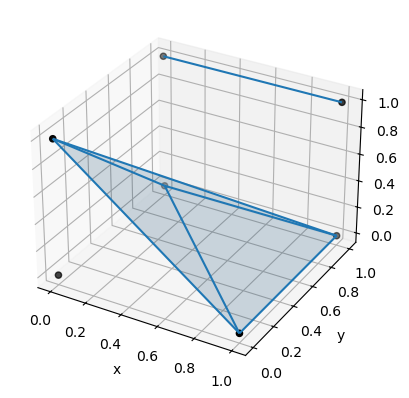

In [11]:
## With matplotlib
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection ='3d')
# Plot triangles
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles, alpha = 0.1)
# Plot points
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = 'k')
# Plot edges
ax.add_collection3d(Line3DCollection(segments=edges))
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

# Construction of simplicial complex from data point

1. Vietoris-Rips Complex
   
    Definition: Let $(X,d)$ be a metric space and let $\epsilon>0$ be a fixed parameter. The Vietoris-Rips complex on metric space $(X,d)$ is constructed through the following:
   
   * Vertices: Each point of $x\in X$ is a vertex
    * Edges: An edge is formed if the distance between two points is smaller or equal to $\epsilon$, i.e. $d(x_i, x_j) \leq \epsilon, \text{where }x_i, x_j\in X$
    * Higher-order simplices:  A k-dimension simplex $S$ is formed if $S = \{x_1, x_2,..., x_{k+1}\}, \text{where } d(x_i, x_j)\leq \epsilon \text{ for all i, j}$       

Example: Consider the following metrix space $X = \{x_1,x_2,x_3,x_4\}$, where 

$$d(x_1, x_2) = 1, d(x_1,x_3) = 2, d(x_1, x_4) = 1.5, d(x_2, x_3) = 1.2, d(x_2, x_4) = 1, d(x_3, x_4) = 0.8$$

* If $\epsilon = 1 , K = \{ \phi, \{x_1\}, \{x_2\}, \{x_3\}, \{x_4\}, \{x_1, x_2\}, \{x_2, x_4\}, \{x_3, x_4\}\}$

* If $\epsilon = 1.5,  K = \{\phi, \{x_1\}, \{x_2\}, \{x_3\}, \{x_4\}, \{x_1, x_2\}, \{x_1, x_4\}, \{x_2, x_3\}, \{x_2, x_4\}, \{x_3, x_4\}, \{x_2, x_3, x_4\}\}$

Gudhi has a built-in function that creates a Vietoris-Rips Complex if given point data. 


Distance matrix:
[[0.         0.78102497 0.70710678 0.66332496 0.91651514 0.8660254
  1.73205081]
 [0.78102497 0.         0.64031242 0.53851648 0.64031242 0.24494897
  1.00498756]
 [0.70710678 0.64031242 0.         0.37416574 0.37416574 0.5
  1.22474487]
 [0.66332496 0.53851648 0.37416574 0.         0.28284271 0.43588989
  1.2       ]
 [0.91651514 0.64031242 0.37416574 0.28284271 0.         0.43588989
  1.0198039 ]
 [0.8660254  0.24494897 0.5        0.43588989 0.43588989 0.
  0.8660254 ]
 [1.73205081 1.00498756 1.22474487 1.2        1.0198039  0.8660254
  0.        ]]


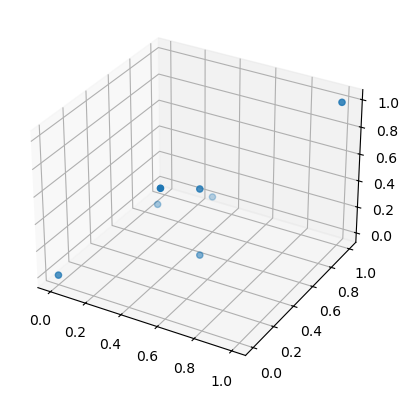

In [13]:
from scipy.spatial.distance import cdist

data = np.array([[0, 0, 0], [0.4, 0.3, 0.6], [0.5, 0.5, 0], [0.2, 0.6, 0.2], [0.4, 0.8, 0.2], [0.5, 0.5, 0.5], [1.0, 1.0, 1.0]])

#compute distance matrix
distance_matrix = cdist(data, data)

print('Distance matrix:')
print(distance_matrix)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])

We will use the function gudhi.RipsComplex() to create the Vietorix-Rips complex

In [15]:
epsilon = 0.4
Rips = gudhi.RipsComplex(points = data, max_edge_length=epsilon)

Rips_cx = Rips.create_simplex_tree(max_dimension=3)

result_str = 'Rips complex is of dimension ' + repr(Rips_cx.dimension()) + ' - ' + repr(Rips_cx.num_simplices()) + ' simplices - ' + repr(Rips_cx.num_vertices()) + ' vertices.'
print(result_str)

print('edges')
edges = []
for s in Rips_cx.get_skeleton(1):  
    e = s[0]
    print(s ,len(s[0])) # for debugging
    if len(e) == 2:
        print(data[e[0]])
        edges.append(data[[e[0],e[1]]])

print('triangles')
for s in Rips_cx.get_skeleton(2):
    if len(s[0]) == 3:
        print(s)
        
triangles = np.array([s[0] for s in Rips_cx.get_skeleton(2) if len(s[0])==3])

print('tetrahedron')
for s in Rips_cx.get_skeleton(3):
    if len(s[0]) == 4:
        print(s)

print(edges)
print(triangles)

Rips complex is of dimension 2 - 12 simplices - 7 vertices.
edges
([0], 0.0) 1
([1, 5], 0.2449489742783178) 2
[0.4 0.3 0.6]
([1], 0.0) 1
([2, 3], 0.37416573867739417) 2
[0.5 0.5 0. ]
([2, 4], 0.37416573867739417) 2
[0.5 0.5 0. ]
([2], 0.0) 1
([3, 4], 0.28284271247461906) 2
[0.2 0.6 0.2]
([3], 0.0) 1
([4], 0.0) 1
([5], 0.0) 1
([6], 0.0) 1
triangles
([2, 3, 4], 0.37416573867739417)
tetrahedron
[array([[0.4, 0.3, 0.6],
       [0.5, 0.5, 0.5]]), array([[0.5, 0.5, 0. ],
       [0.2, 0.6, 0.2]]), array([[0.5, 0.5, 0. ],
       [0.4, 0.8, 0.2]]), array([[0.2, 0.6, 0.2],
       [0.4, 0.8, 0.2]])]
[[2 3 4]]


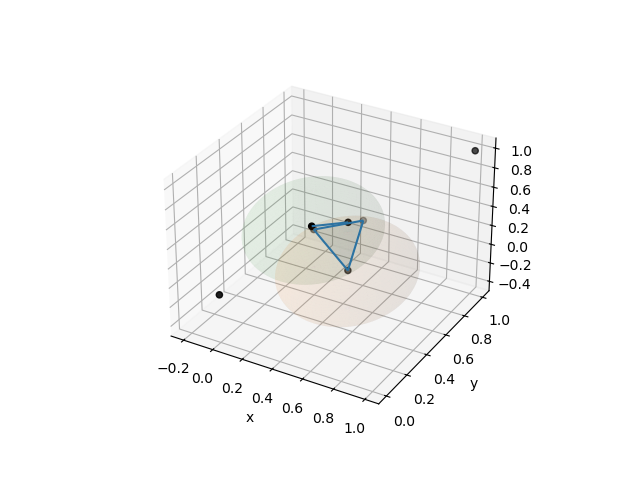

In [32]:
%matplotlib widget

## With matplotlib
fig = plt.figure()
ax = plt.axes(projection ='3d')
# Plot triangles
ax.plot_trisurf(data[:,0], data[:,1], data[:,2], triangles=triangles, alpha = 0.1)
# Plot points
ax.scatter3D(data[:,0], data[:,1], data[:,2], color = 'k')
# Plot edges
ax.add_collection3d(Line3DCollection(segments=edges))

### Visualize the "reach" of epsilon of a point
# Sphere parameters
def sphere(center, radius):
    # return a mesh grid for sphere with radius r centered at center
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2 * np.pi, 100)

    # Create a mesh grid for the sphere
    phi, theta = np.meshgrid(phi, theta)
    x = center[0] + radius * np.sin(phi) * np.cos(theta)
    y = center[1] + radius * np.sin(phi) * np.sin(theta)
    z = center[2] + radius * np.cos(phi)
    return x, y, z
    
x1, y1, z1 = sphere(data[2], radius = epsilon)
x2, y2, z2 = sphere(data[3], radius = epsilon)
ax.plot_surface(x1, y1, z1, alpha=0.05)
ax.plot_surface(x2, y2, z2, alpha=0.05)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [30]:
# r = 0.5
# R = 1

# num_pts = 1000
# arr_x = []
# arr_y = []
# curr_num_pts = 0

# while curr_num_pts != num_pts:
#     phi = 2.0 * math.pi * random.random()
#     rad = R * math.sqrt(random.random())
#     x = rad * math.cos(phi)
#     y = rad * math.sin(phi)
#     if ( x**2 + y**2 >= r*r ):
#         arr_x.append(x)
#         arr_y.append(y)
#         curr_num_pts += 1

# plt.plot(arr_x, arr_y, '.')